In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-prices-in-uk/used_cars_UK.csv


# 1. Import necessary libraries

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 2. Load the dataset

In [3]:
df=pd.read_csv("/kaggle/input/used-cars-prices-in-uk/used_cars_UK.csv")

# 3.  Basic Data Exploration

In [4]:
df.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
df.shape  # Dataset Shape

(3685, 14)

In [6]:
df.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB


In [7]:
df.describe()   # Statistics

,Unnamed: 0,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,2314.770963,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,1415.821308,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,0.000000,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,1059.000000,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,2279.000000,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,3593.000000,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,4727.000000,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


# 4. Data Preprocessing

In [8]:
df.isnull().sum() 

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

**Handling Missing Values**

In [9]:
df['Previous Owners'].fillna(df['Previous Owners'].mean(), inplace=True)

df['Doors'].fillna(df['Doors'].mean(), inplace=True)

df['Seats'].fillna(df['Seats'].mean(), inplace=True)

**Removing irrelevant features**

In [10]:
df=df.drop(['Unnamed: 0','Service history','title','Registration_Year'], axis=1)

df.dropna(subset=['Emission Class'], inplace=True)

**Regex : Regular Expressions**

In [11]:
# Remove 'L' using regex

df['Engine'] = df['Engine'].str.replace('L', '', regex=True).astype(float)

df['Engine'].fillna(0, inplace=True)

In [12]:
# Remove 'Euro' prefix  using regex

df['Emission Class'] = df['Emission Class'].str.replace('Euro', '', regex=True).astype(int)


**Label encoding**

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [14]:
categorical_columns = ['Fuel type', 'Body type', 'Gearbox']

# Apply label encoding to each categorical column

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [15]:
df.head()

,Price,Mileage(miles),Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class
0,6900,70189,3.000000,0,4,1.4,1,5.0,5.0,6
1,1495,88585,4.000000,2,4,1.2,1,3.0,5.0,4
2,949,137000,2.807557,2,4,1.4,1,5.0,5.0,5
3,2395,96731,5.000000,2,4,1.4,1,3.0,4.0,4
4,1000,85000,2.807557,0,4,1.3,1,5.0,5.0,5


**Define features and the target variable**

In [16]:
X = df.drop('Price', axis=1)
y = df['Price']


# 5. Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Building

**Model Selection**

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

**Model Training**

In [20]:
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1879.60
Mean Squared Error (MSE): 7345176.72
Root Mean Squared Error (RMSE): 2710.20
R-squared (R2): 0.67


# 8. Scatter Plot with Regression Line

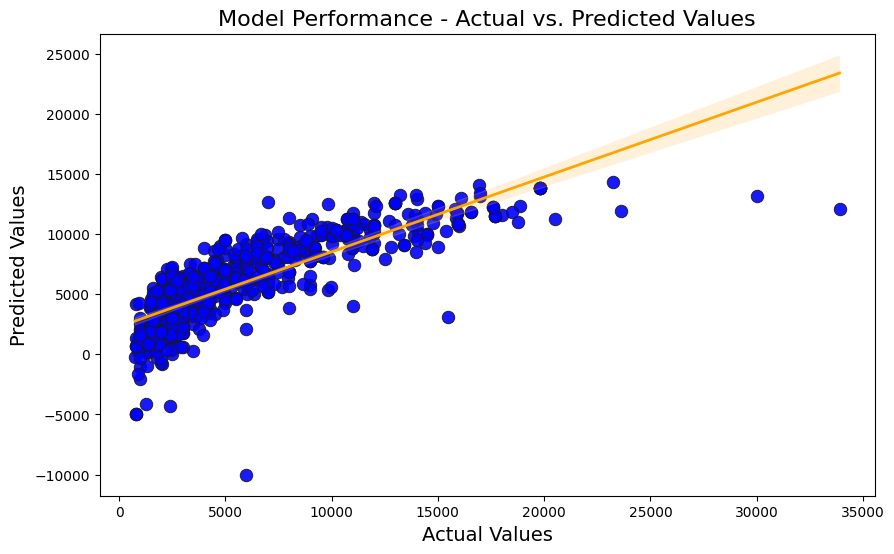

In [23]:
plt.figure(figsize=(10, 6))

# Create a scatterplot 
sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

# Add a regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "orange", "lw": 2})


plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)


# Add a grid
sns.set(style='whitegrid')


plt.show()